# Training networks using framework from `ico_parser.py`

## Objective

## Steps

## 1. File with information about ICO

In [1]:
import pandas as pd
import os
import re
import pytz
from datetime import datetime, timedelta

In [2]:
df_info = pd.read_csv('lista_ico_2020-08-17_tab3.csv', sep=',')

In [3]:
df_info.head()

ico                                      adress  fraud  start_date  \
0       0X  0xe41d2489571d322189246dafa5ebde1f4699f498      0  2017-08-11   
1   0XCERT  0x83e2be8d114f9661221384b3a50d24b96a5653f5      1  2018-06-26   
2     4NEW  0x241ba672574a78a3a604cdd0a94429a73a84a324      1  2018-08-20   
3  ABULABA  0xd938137e6d96c72e4a6085412ada2dad78ff89c4      1  2018-04-19   
4     AELF  0xbf2179859fc6d5bee9bf9158632dc51678a4100e      0  2017-12-18   

  market_start_date  diff_days  market_days size_ok price  market_cap  \
0        2017-08-15          4         1124     NaN   NaN        45.0   
1        2018-07-11         15          794       x   NaN         NaN   
2        2018-08-20          0          754       x   NaN         NaN   
3        2018-12-16        241          636     NaN     x         NaN   
4        2017-12-21          3          996     NaN   NaN       154.0   

  o_concur  biggest_holder  exchange  contract date_analysis code site  \
0        x               2         6        14    2018-02-11  NaN  NaN   
1      NaN              12         2         0    2019-01-07    x    x   
2      NaN              50         7         0    2019-02-16    x  NaN   
3      NaN              13         7        41    2019-06-14    x  NaN   
4        x              13        10         0    2018-06-19  NaN  NaN   

  social_media  
0          NaN  
1            x  
2          NaN  
3          NaN  
4          NaN

## 3. Load data from .py file

In [4]:
from dict_ico_array_len20 import dict_ico_array20

## 4. Filter data for size equals to 20

In [5]:
dict_perc_transactions_20 = {k:v[0] for k,v in dict_ico_array20.items() if len(v[0]) == 20}
dict_perc_new_holders_20 = {k:v[1] for k,v in dict_ico_array20.items() if len(v[1]) == 20}
dict_gas_ratio = {k:v[4] for k,v in dict_ico_array20.items() if len(v[4]) == 20}

In [6]:
df_transactions_20 = pd.DataFrame(dict_perc_transactions_20).T
df_new_holders_20 = pd.DataFrame(dict_perc_new_holders_20).T
df_gasratio_20 = pd.DataFrame(dict_gas_ratio).T

In [7]:
print(df_transactions_20.shape)
print(df_new_holders_20.shape)
print(df_gasratio_20.shape)

(253, 20)
(246, 20)
(253, 20)


## 5. Plotting the dataset

In [8]:
import plotly.express as px

In [9]:
df_info.head()

ico                                      adress  fraud  start_date  \
0       0X  0xe41d2489571d322189246dafa5ebde1f4699f498      0  2017-08-11   
1   0XCERT  0x83e2be8d114f9661221384b3a50d24b96a5653f5      1  2018-06-26   
2     4NEW  0x241ba672574a78a3a604cdd0a94429a73a84a324      1  2018-08-20   
3  ABULABA  0xd938137e6d96c72e4a6085412ada2dad78ff89c4      1  2018-04-19   
4     AELF  0xbf2179859fc6d5bee9bf9158632dc51678a4100e      0  2017-12-18   

  market_start_date  diff_days  market_days size_ok price  market_cap  \
0        2017-08-15          4         1124     NaN   NaN        45.0   
1        2018-07-11         15          794       x   NaN         NaN   
2        2018-08-20          0          754       x   NaN         NaN   
3        2018-12-16        241          636     NaN     x         NaN   
4        2017-12-21          3          996     NaN   NaN       154.0   

  o_concur  biggest_holder  exchange  contract date_analysis code site  \
0        x               2         6        14    2018-02-11  NaN  NaN   
1      NaN              12         2         0    2019-01-07    x    x   
2      NaN              50         7         0    2019-02-16    x  NaN   
3      NaN              13         7        41    2019-06-14    x  NaN   
4        x              13        10         0    2018-06-19  NaN  NaN   

  social_media  
0          NaN  
1            x  
2          NaN  
3          NaN  
4          NaN

### Transactions

In [25]:
df_series_stack = pd.DataFrame(df_transactions_20.iloc[:, :-1].stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [26]:
df_series_stack.head()

level_0  days  series
0      0X     0  0.1956
1      0X     1  0.3770
2      0X     2  0.4623
3      0X     3  0.5442
4      0X     4  0.6657

In [27]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

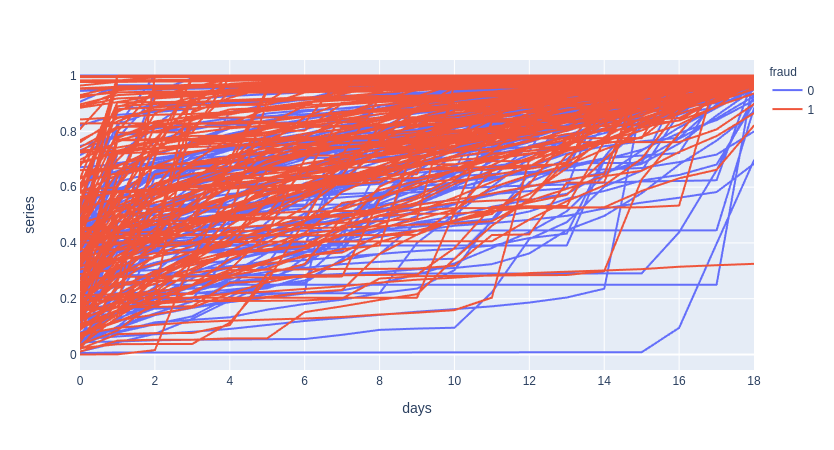

In [28]:


df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

### New holders

In [11]:
df_series_stack = pd.DataFrame(df_new_holders_20.iloc[:, :-1].stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [12]:
df_series_stack.head()

level_0  days    series
0      0X     0  0.265630
1      0X     1  0.412236
2      0X     2  0.495522
3      0X     3  0.580434
4      0X     4  0.687593

In [13]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

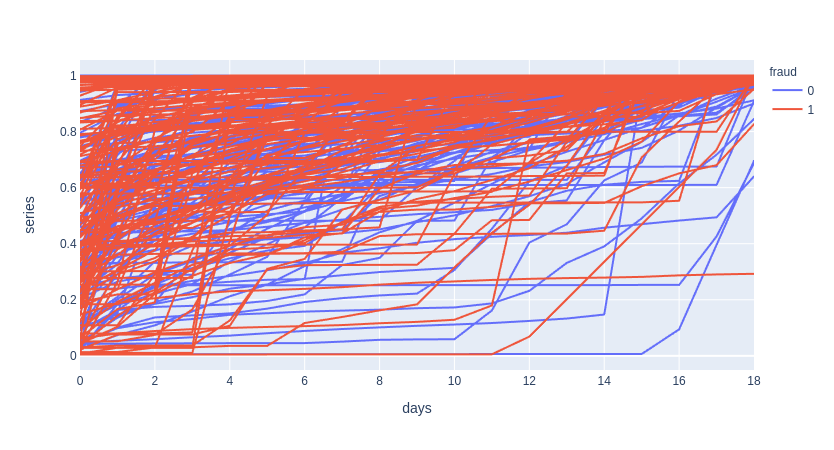

In [14]:


df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

### Gas ratio

In [17]:
df_series_stack = pd.DataFrame(df_gasratio_20.iloc[:20, :-1].stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [18]:
df_series_stack.head()

level_0  days    series
0      0X     0  0.282018
1      0X     1  0.266172
2      0X     2  0.265581
3      0X     3  0.246847
4      0X     4  0.281065

In [19]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

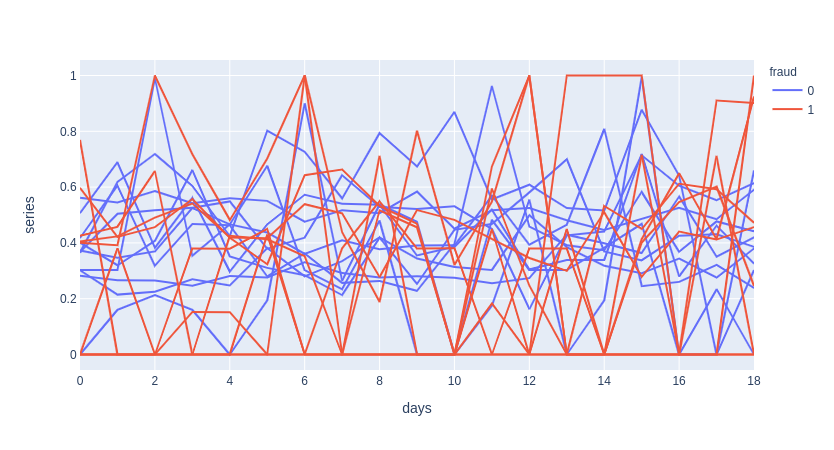

In [20]:
df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

## 6. Dataset for training

In [29]:
df_training_transactions = df_transactions_20.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_transactions.set_index('ico', inplace=True)

In [21]:
df_training_new_holders = df_new_holders_20.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_new_holders.set_index('ico', inplace=True)

In [22]:
df_training_new_holders.head()

0         1         2         3         4         5         6  \
ico                                                                             
0X       0.265630  0.412236  0.495522  0.580434  0.687593  0.719224  0.743982   
0XCERT   0.486036  0.680059  0.718275  0.744733  0.755512  0.825086  0.840274   
4NEW     0.594535  0.910720  0.923332  0.937936  0.941033  0.944795  0.946676   
ABULABA  0.946543  0.949394  0.952958  0.958660  0.960798  0.962937  0.964362   
AELF     0.047527  0.053810  0.059333  0.066224  0.072254  0.080665  0.088822   

                7         8         9  ...        11        12        13  \
ico                                    ...                                 
0X       0.765031  0.790958  0.811295  ...  0.856018  0.870479  0.887621   
0XCERT   0.862812  0.874571  0.888290  ...  0.950024  0.959824  0.969623   
4NEW     0.951875  0.956964  0.959619  ...  0.967142  0.970351  0.977099   
ABULABA  0.965075  0.970777  0.975053  ...  0.980043  0.982181  0.985745   
AELF     0.095612  0.101490  0.107114  ...  0.116994  0.124544  0.133056   

               14        15        16        17        18   19  fraud  
ico                                                                    
0X       0.906218  0.927838  0.947633  0.972561  0.987593  1.0      0  
0XCERT   0.977462  0.984321  0.987261  0.991671  0.995590  1.0      1  
4NEW     0.980861  0.986171  0.990486  0.992035  0.997787  1.0      1  
ABULABA  0.986458  0.987170  0.989309  0.992872  0.995011  1.0      1  
AELF     0.147294  0.949737  0.961340  0.976794  0.988752  1.0      0  

[5 rows x 21 columns]

In [23]:
df_training_gasratio = df_gasratio_20.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_gasratio.set_index('ico', inplace=True)

## Importing `ICODeepTraining`

In [30]:
from ico_parser import ICODeepTraining

### 7.1 Define the model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [37]:
model_mlp = Sequential()
model_mlp.add(Dense(20, input_dim=20, activation='relu'))
model_mlp.add(Dense(30, activation='relu'))
model_mlp.add(Dense(20, activation='relu'))
model_mlp.add(Dense(10, activation='relu'))
model_mlp.add(Dense(1, activation='sigmoid'))

In [38]:
ico_training = ICODeepTraining(df_training_transactions.iloc[:, :-1],
                               df_training_transactions.iloc[:, -1],
                               model_mlp,
                               ann_type='mlp',
                               size_array=60)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 1,891
Trainable params: 1,891
Non-trainable params: 0
_________________________________________________________________


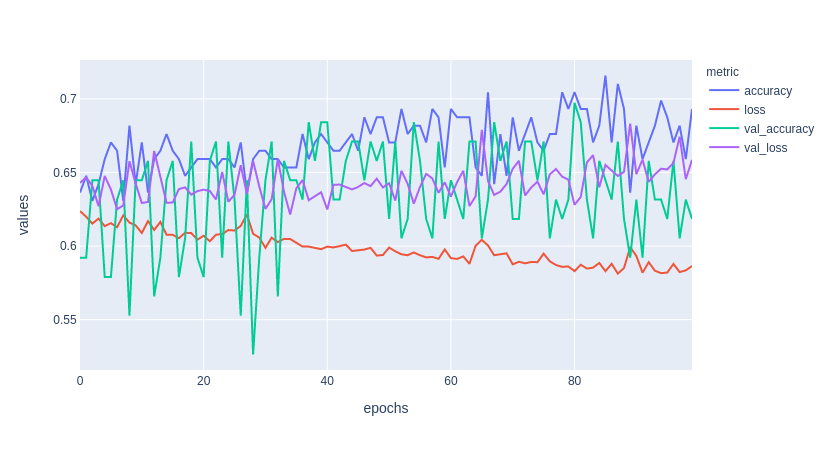

In [41]:
ico_training.train_network(loss='binary_crossentropy', 
                      optimizer='adam',
                      metrics=['accuracy'] ,
                      epochs=100,
                      verbose=0, 
                      batch_size=32)

ico_training.plot_training()

## CNN
https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [42]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(20, 1)))
model_cnn.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(224, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

In [43]:
ico_training = ICODeepTraining(df_training_gasratio.iloc[:, :-1],
                               df_training_gasratio.iloc[:, -1],
                               model_cnn,
                               ann_type='cnn',
                               size_array=20)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 18, 8)             32        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 8)             200       
_________________________________________________________________
dropout (Dropout)            (None, 16, 8)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 224)               14560     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

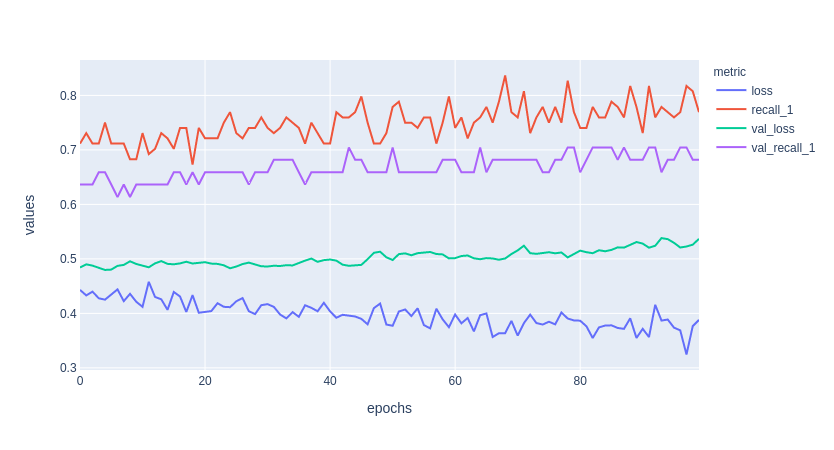

In [45]:
ico_training.train_network(loss='binary_crossentropy', 
                      optimizer='adam',
                      metrics=[Recall()] ,
                      epochs=100,
                      verbose=0, 
                      batch_size=32)
ico_training.plot_training()

### LSTM
Based on the following articles:
1. https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
2. https://medium.com/@shivajbd/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e
3. https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/

In [46]:
import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

### Using the framework for LSTM

In [51]:
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(20, 1), return_sequences=True))
model_lstm.add(Dense(60, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

In [52]:
ico_training = ICODeepTraining(df_training_gasratio.iloc[:, :-1],
                               df_training_gasratio.iloc[:, -1],
                               model_lstm,
                               ann_type='lstm',
                               size_array=60)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 100)           40800     
_________________________________________________________________
dense_14 (Dense)             (None, 20, 60)            6060      
_________________________________________________________________
dense_15 (Dense)             (None, 20, 1)             61        
Total params: 46,921
Trainable params: 46,921
Non-trainable params: 0
_________________________________________________________________


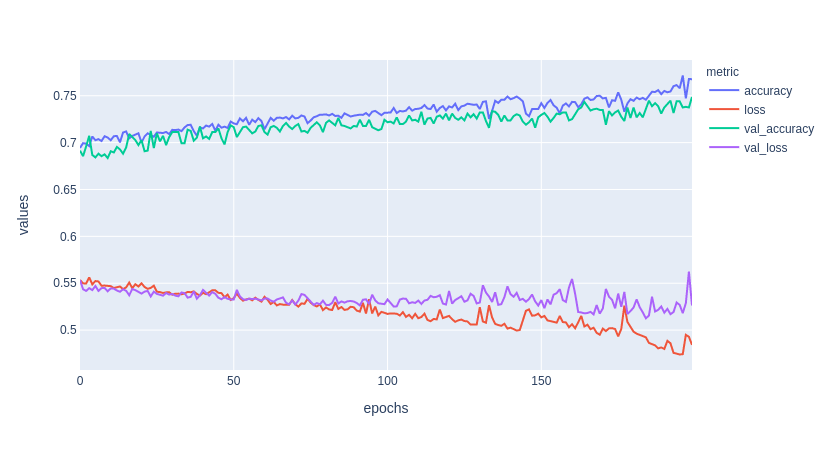

In [54]:
ico_training.train_network(loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy'],#, Recall()],
        epochs=200,
        verbose=0,
        batch_size=32)
ico_training.plot_training()